In [241]:
import pandas as pd
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt



In [242]:

df= pd.read_csv("tweets_unbiased_labelled_GPT3_2000.csv")


label_mapping = {
    'no verdict': 'no verdict',
    "'no verdict'": 'no verdict',
    "'true'": 'true',
    "'false'": 'false',
    'FALSE': 'false',
    'False': 'false',
    'TRUE': 'true',
    'No verdict': 'no verdict',
    "No verdict": 'no verdict',
    'No verdict': 'no verdict',
    "'No verdict'": 'no verdict',
    "TRUE": 'true',
    "FALSE": 'false',
    "True": 'true',
    "'False'": 'false',
    "'True'": 'true',
    "'without evidence'":'no verdict',
    "'no verdict'.":'no verdict',

}

# applying the mapping dictionary to standardize labels in both datasets
df['Fact_assessment_not_neutral'] = df['Fact_assessment_not_neutral'].map(label_mapping).fillna(df['Fact_assessment_not_neutral'])
df['Fact assessment'] = df['Fact assessment'].map(label_mapping).fillna(df['Fact assessment'])



In [243]:
display(df.head(15))

,Unnamed: 0,created_at_fuzzy,state_likely_tweeted_from,text,source,display_text_width,lang,favorite_count,retweet_count,is_quote,...,friends_count,listed_count,statuses_count,favourites_count,Biden initially,Trump initially,Toxicity_not_neutral,Fact_assessment_not_neutral,Toxicity,Fact assessment
0,0,2020-08-13T16:55:49Z,California,LIVE: presidential candidate holds press confe...,Twitter Web App,71,en,0,0,False,...,4938,4,39349,23299,0,1,1,no verdict,1.0,no verdict
1,1,2020-08-30T00:03:31Z,Tennessee,presidential candidate’s claim the ‘silent maj...,Twitter Web App,205,en,9,2,False,...,3000,2,23786,30906,0,1,8,no verdict,8.0,no verdict
2,2,2020-10-26T23:16:05Z,New York,#NewHampshire #VoteBlue #VoteBlueToSaveAmerica...,Twitter Web App,267,en,7,4,False,...,26550,52,304911,146137,1,0,2,true,1.0,true
3,3,2020-08-24T09:54:59Z,Florida,"@davidsirota I'm so confused, when is the medi...",Twitter for Android,262,en,2,0,False,...,375,5,16851,7429,1,0,7,no verdict,5.0,no verdict
4,4,2021-02-04T11:31:07Z,Washington,@Carlos27480217 @DonaldJTrumpJr Yep! He has Ba...,Twitter for Android,88,en,0,0,False,...,177,0,2618,1517,1,0,8,false,8.0,no verdict
5,5,2021-01-03T11:54:56Z,Texas,@HouseGOP @SenateGOP @GOP @NRSC @NRCC It is in...,Twitter for iPhone,270,en,0,0,True,...,15408,29,37936,31978,1,0,8,false,7.0,no verdict
6,6,2020-09-03T03:39:01Z,Illinois,@dachs8 @JordanChariton Seriously? Almost ever...,Twitter for Android,278,en,6,0,False,...,1588,6,7168,125089,1,0,7,no verdict,8.0,no verdict
7,7,2021-02-10T01:29:58Z,North Carolina,presidential candidate endorses sending stimul...,Twitter for iPhone,120,en,0,0,False,...,295,1,84774,38849,1,0,2,true,1.0,true
8,8,2020-12-16T19:04:31Z,California,Doug Collins is in the Deep state Mitch McConn...,Twitter for Android,195,en,1,0,False,...,523,0,1245,1427,0,1,8,false,9.0,false
9,9,2020-07-29T13:51:59Z,Kansas,It was presidential candidate's antic semitic ...,Twitter for Android,69,en,0,0,True,...,637,0,115742,48100,0,1,8,false,7.0,true


In [244]:
table = pd.crosstab(df['Fact_assessment_not_neutral'], df['Fact assessment'])
display(table)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,261,238,34
no verdict,63,850,78
true,34,196,246


divide the rows by the row total - probability 

In [245]:
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,0.489681,0.446529,0.063790
no verdict,0.063572,0.857719,0.078708
true,0.071429,0.411765,0.516807


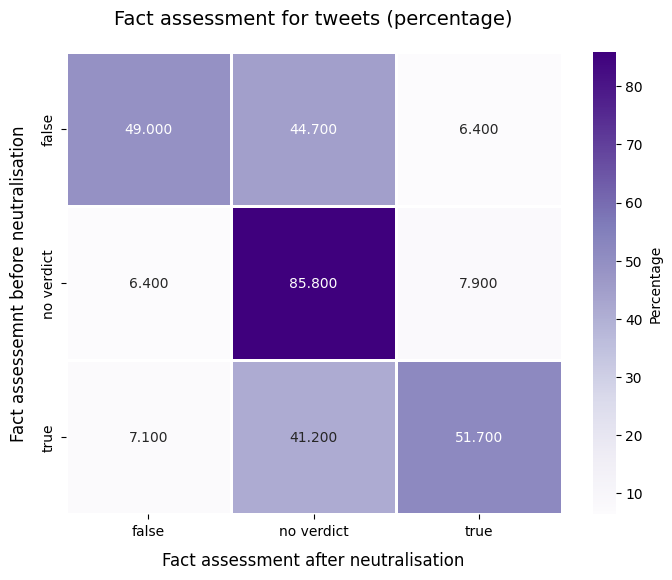

In [246]:

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Fact assessemnt before neutralisation', fontsize=12, labelpad=10)

# displaying the plot
plt.show()


In [247]:

kappa = cohen_kappa_score(df['Fact_assessment_not_neutral'], df['Fact assessment'])

print(f"Cohen's kappa: {kappa:.3f}")


Cohen's kappa: 0.457


Cohen's Kappa is a statistical measure used to quantify the level of agreement between two raters (or judges, observers, etc.) who each classify items into categories. It is 1.0 when there is perfect agreement between the raters.


In [248]:

# converting numerical labels to string labels
df['Toxicity_not_neutral'] = df['Toxicity_not_neutral'].astype(int)
#df['Toxicity'] = df['Toxicity'].astype(str)
df.dropna(subset=['Toxicity'], inplace=True)
df['Toxicity'] = df['Toxicity'].astype(int)


table_toxicity = pd.crosstab(df['Toxicity_not_neutral'], df['Toxicity'])
table_toxicity = table_toxicity.sort_index()
display(table_toxicity)


Toxicity,1,2,3,4,5,6,7,8,9,10
Toxicity_not_neutral,,,,,,,,,,
1,151,25,7,1,0,1,1,0,0,1
2,106,94,43,4,1,2,2,3,0,0
3,60,81,109,23,16,18,32,15,1,0
4,0,0,0,0,1,1,1,0,0,0
6,0,0,1,0,1,3,0,0,0,0
7,26,40,84,18,36,40,131,95,7,2
8,9,8,21,6,8,20,145,306,79,20
9,1,0,0,0,0,0,4,18,25,21
10,0,0,0,0,0,0,0,4,1,14


In [249]:
row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
display(table_normalized_toxicity)

Toxicity,1,2,3,4,5,6,7,8,9,10
Toxicity_not_neutral,,,,,,,,,,
1,0.807487,0.133690,0.037433,0.005348,0.000000,0.005348,0.005348,0.000000,0.000000,0.005348
2,0.415686,0.368627,0.168627,0.015686,0.003922,0.007843,0.007843,0.011765,0.000000,0.000000
3,0.169014,0.228169,0.307042,0.064789,0.045070,0.050704,0.090141,0.042254,0.002817,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.200000,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,0.000000
7,0.054280,0.083507,0.175365,0.037578,0.075157,0.083507,0.273486,0.198330,0.014614,0.004175
8,0.014469,0.012862,0.033762,0.009646,0.012862,0.032154,0.233119,0.491961,0.127010,0.032154
9,0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.057971,0.260870,0.362319,0.304348
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210526,0.052632,0.736842


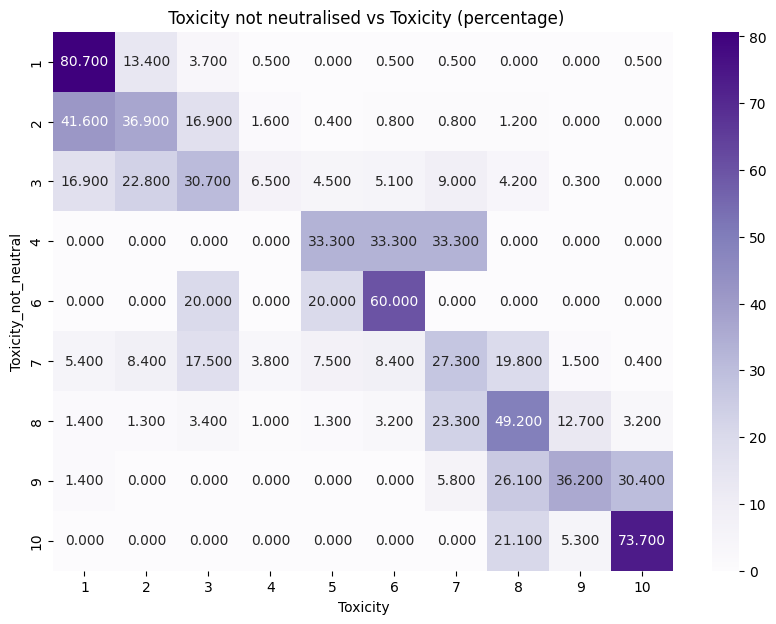

In [250]:
# Plotting the heatmap
table_normalized_toxicity = table_normalized_toxicity.round(3) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Purples", fmt=".3f")
plt.title(" Toxicity not neutralised vs Toxicity (percentage)")
plt.show()

## Biden subset



In [251]:
df_biden = df[df['Biden initially'] == 1]

display(df_biden)

,Unnamed: 0,created_at_fuzzy,state_likely_tweeted_from,text,source,display_text_width,lang,favorite_count,retweet_count,is_quote,...,friends_count,listed_count,statuses_count,favourites_count,Biden initially,Trump initially,Toxicity_not_neutral,Fact_assessment_not_neutral,Toxicity,Fact assessment
2,2,2020-10-26T23:16:05Z,New York,#NewHampshire #VoteBlue #VoteBlueToSaveAmerica...,Twitter Web App,267,en,7,4,False,...,26550,52,304911,146137,1,0,2,true,1,true
3,3,2020-08-24T09:54:59Z,Florida,"@davidsirota I'm so confused, when is the medi...",Twitter for Android,262,en,2,0,False,...,375,5,16851,7429,1,0,7,no verdict,5,no verdict
4,4,2021-02-04T11:31:07Z,Washington,@Carlos27480217 @DonaldJTrumpJr Yep! He has Ba...,Twitter for Android,88,en,0,0,False,...,177,0,2618,1517,1,0,8,false,8,no verdict
5,5,2021-01-03T11:54:56Z,Texas,@HouseGOP @SenateGOP @GOP @NRSC @NRCC It is in...,Twitter for iPhone,270,en,0,0,True,...,15408,29,37936,31978,1,0,8,false,7,no verdict
6,6,2020-09-03T03:39:01Z,Illinois,@dachs8 @JordanChariton Seriously? Almost ever...,Twitter for Android,278,en,6,0,False,...,1588,6,7168,125089,1,0,7,no verdict,8,no verdict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,2020-09-11T12:26:09Z,Florida,Hannity: Another blatant lie from presidential...,Twitter Web App,80,en,0,0,False,...,357,6,16122,757,1,0,3,no verdict,7,no verdict
1990,1990,2021-04-22T05:27:01Z,Mississippi,@kittenhawk1 @FoxNews That’s a crock!! She sh...,Twitter for iPhone,233,en,0,0,False,...,842,1,1582,818,1,0,7,false,7,no verdict
1991,1991,2021-04-18T18:02:09Z,Alaska,@SarahLarchmont I get so tired of these Vote f...,Twitter for iPhone,46,en,1,0,False,...,1024,40,65146,9061,1,0,3,no verdict,3,no verdict
1997,1997,2021-02-06T06:35:34Z,North Carolina,@AmyAThatcher I guess the right wingers are pi...,Twitter for Android,125,en,1,0,False,...,512,9,26537,156580,1,0,3,no verdict,4,no verdict


In [252]:
table = pd.crosstab(df_biden['Fact_assessment_not_neutral'], df_biden['Fact assessment'])
display(table)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,108,103,7
no verdict,18,187,22
true,11,92,96


In [253]:
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,0.495413,0.472477,0.032110
no verdict,0.079295,0.823789,0.096916
true,0.055276,0.462312,0.482412


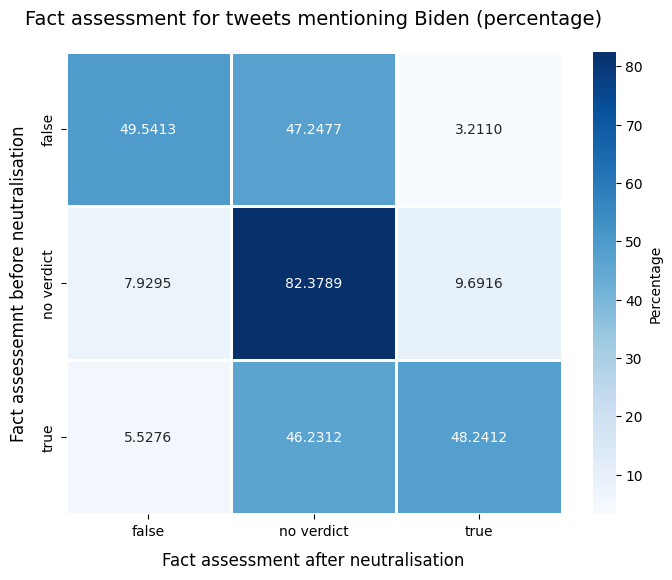

In [254]:

table_normalized = table_normalized * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Blues", fmt=".4f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets mentioning Biden (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Fact assessemnt before neutralisation', fontsize=12, labelpad=10)

# displaying the plot
plt.show()


#### toxicity for Biden

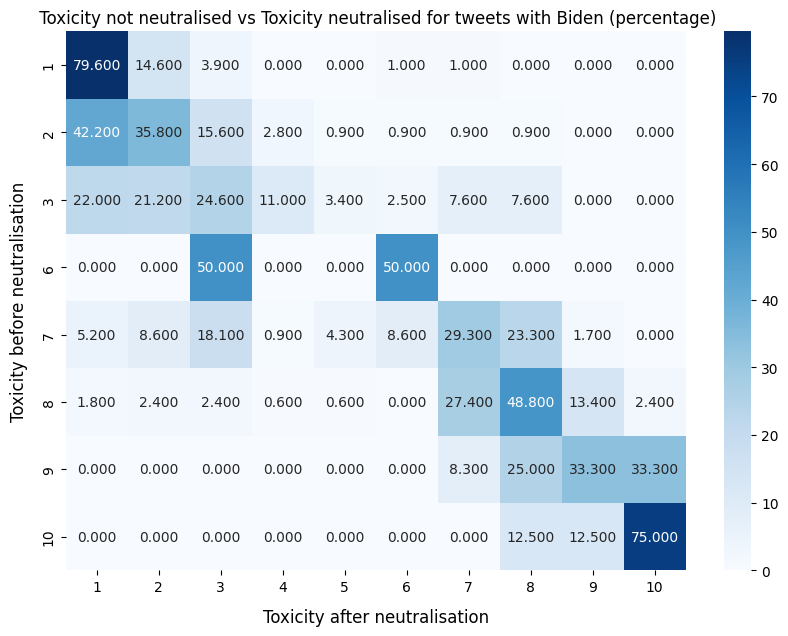

In [255]:

table_toxicity = pd.crosstab(df_biden['Toxicity_not_neutral'], df_biden['Toxicity'])
table_toxicity = table_toxicity.sort_index()

row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
table_normalized_toxicity = table_normalized_toxicity.round(3) *100

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Blues", fmt=".3f")
plt.title(" Toxicity not neutralised vs Toxicity neutralised for tweets with Biden (percentage)")

# the position of the labels and ticks
plt.xlabel('Toxicity after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Toxicity before neutralisation', fontsize=12, labelpad=10)

plt.show()


## Trump subset

In [259]:
df_trump = df[df['Trump initially'] == 1]


display(df_trump.head(5))

,Unnamed: 0,created_at_fuzzy,state_likely_tweeted_from,text,source,display_text_width,lang,favorite_count,retweet_count,is_quote,...,friends_count,listed_count,statuses_count,favourites_count,Biden initially,Trump initially,Toxicity_not_neutral,Fact_assessment_not_neutral,Toxicity,Fact assessment
0,0,2020-08-13T16:55:49Z,California,LIVE: presidential candidate holds press confe...,Twitter Web App,71,en,0,0,False,...,4938,4,39349,23299,0,1,1,no verdict,1,no verdict
1,1,2020-08-30T00:03:31Z,Tennessee,presidential candidate’s claim the ‘silent maj...,Twitter Web App,205,en,9,2,False,...,3000,2,23786,30906,0,1,8,no verdict,8,no verdict
8,8,2020-12-16T19:04:31Z,California,Doug Collins is in the Deep state Mitch McConn...,Twitter for Android,195,en,1,0,False,...,523,0,1245,1427,0,1,8,false,9,false
9,9,2020-07-29T13:51:59Z,Kansas,It was presidential candidate's antic semitic ...,Twitter for Android,69,en,0,0,True,...,637,0,115742,48100,0,1,8,false,7,true
11,11,2020-12-25T11:32:41Z,Pennsylvania,"@PreetBharara I've always stood by *pled*, unt...",Twitter for Android,108,en,0,0,False,...,242,7,22893,18428,0,1,2,no verdict,1,no verdict


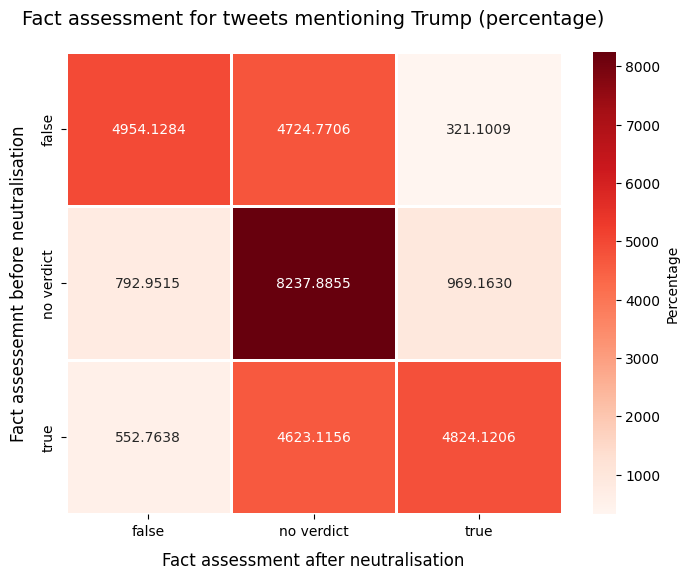

In [257]:

table_normalized = table_normalized * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Reds", fmt=".4f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets mentioning Trump (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Fact assessemnt before neutralisation', fontsize=12, labelpad=10)

# displaying the plot
plt.show()

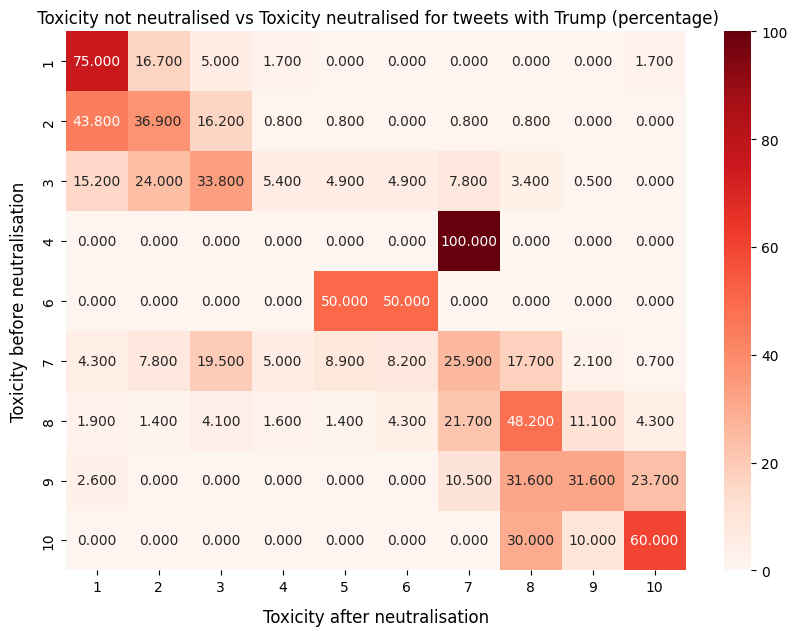

In [258]:

table_toxicity = pd.crosstab(df_trump['Toxicity_not_neutral'], df_trump['Toxicity'])
table_toxicity = table_toxicity.sort_index()

row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
table_normalized_toxicity = table_normalized_toxicity.round(3) *100

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Reds", fmt=".3f")
plt.title(" Toxicity not neutralised vs Toxicity neutralised for tweets with Trump (percentage)")

# the position of the labels and ticks
plt.xlabel('Toxicity after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Toxicity before neutralisation', fontsize=12, labelpad=10)

plt.show()